# Loan Default Prediction Using KNN

### Importing necessary libraries

In [57]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Loading and Preprocessing the Training Data

In [58]:
train = pd.read_csv('train_LZV4RXX.csv')
train.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [59]:
train = train.drop(['loan_id','proof_submitted'],axis=1)
train.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,504264,820920,2,2,0,0
1,48,1.0,728556,831444,6,2,0,0
2,30,2.0,642936,826092,0,0,0,1
3,28,1.0,746556,930924,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0


In [60]:
train.isnull().sum()

age                   0
education           245
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [61]:
train.shape

(7000, 8)

In [62]:
train = train.drop(['education'],axis=1)
train.head()

,age,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,504264,820920,2,2,0,0
1,48,728556,831444,6,2,0,0
2,30,642936,826092,0,0,0,1
3,28,746556,930924,0,0,0,0
4,29,1139880,1902000,0,0,0,0


In [63]:
train.isnull().sum()

age                 0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [64]:
train.shape

(7000, 7)

### Showing the Corelation between the Features and Target Variables of Training Data

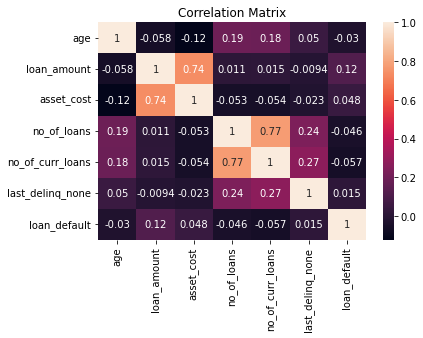

In [65]:
sns.heatmap(train.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [66]:
train_features = train.iloc[:,0:-1].values
train_target = train.iloc[:,-1].values

In [67]:
features.shape

(7000, 6)

In [68]:
target.shape

(7000,)

### Loading and Preprocessing the Test Data

In [69]:
test = pd.read_csv('test_4zJg83n.csv')
test.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [70]:
test = test.drop(['proof_submitted','education'],axis=1)
test.head()

,loan_id,age,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,636936,768240,2,2,0
1,7002,28,548988,693060,3,3,0
2,7003,28,651756,936600,0,0,0
3,7004,45,614676,744840,4,3,0
4,7005,48,625236,839400,0,0,0


In [71]:
test.shape

(3000, 7)

### Showing the Corelation between the Features of Test Data

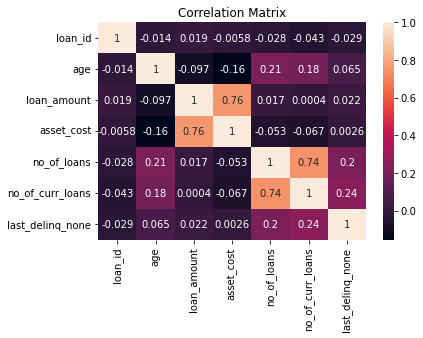

In [72]:
sns.heatmap(test.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [77]:
test_features = test.iloc[:,1:].values
test_labels = test.iloc[:,0].values

In [78]:
test_features.shape

(3000, 6)

In [79]:
test_labels.shape

(3000,)

### Selection of best No of Neighbors

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(train_features,train_target,test_size=0.25,random_state=101)

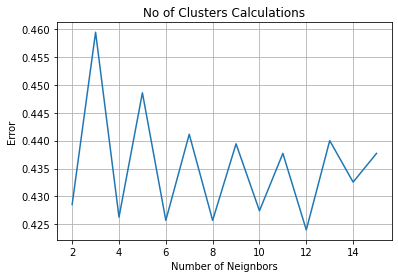

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
acc = []
f1 = []
for i in range(2,16):
    model = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=i))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc.append(mean_squared_error(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
plt.plot(range(2,16),acc)
plt.title('No of Clusters Calculations')
plt.xlabel('Number of Neignbors')
plt.ylabel('Error')
plt.grid()
plt.show()

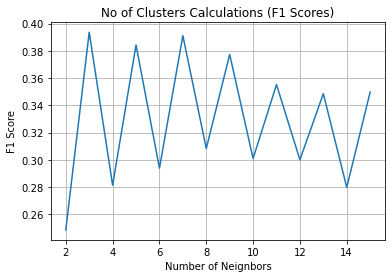

In [86]:
plt.plot(range(2,16),f1)
plt.title('No of Clusters Calculations (F1 Scores)')
plt.xlabel('Number of Neignbors')
plt.ylabel('F1 Score')
plt.grid()
plt.show()

### Fitting the Subset of Dataset in the Model and Calculating its Accuracy and F1 Score

In [87]:
model = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=7))
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Text(0.5, 257.44, 'Predicted label')

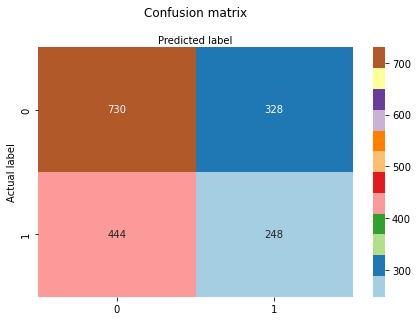

In [88]:
cnf_matrix = confusion_matrix(y_test,y_pred)
class_names = ['0','1']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='Paired',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [89]:
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1058
           1       0.43      0.36      0.39       692

    accuracy                           0.56      1750
   macro avg       0.53      0.52      0.52      1750
weighted avg       0.55      0.56      0.55      1750



In [90]:
print(accuracy_score(y_test,y_pred))

0.5588571428571428


In [91]:
print(f1_score(y_test,y_pred))

0.39116719242902215


### Predicting Results from Test Dataset

In [92]:
model = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=7))
model.fit(train_features,train_target)
y_pred = model.predict(test_features)

In [93]:
y_pred.shape

(3000,)

In [94]:
test_labels.shape

(3000,)

In [95]:
type(y_pred)

numpy.ndarray

In [96]:
type(test_labels)

numpy.ndarray

In [97]:
ans = np.vstack((test_labels,y_pred))

In [99]:
ans=ans.T

In [100]:
ans.shape

(3000, 2)

In [101]:
ans

array([[ 7001,     0],
       [ 7002,     1],
       [ 7003,     1],
       ...,
       [ 9998,     0],
       [ 9999,     0],
       [10000,     0]], dtype=int64)

### Saving the Results in .csv Files

In [102]:
df = pd.DataFrame(ans,columns=['loan_id','loan_default'])

In [104]:
df.to_csv('KNN Submission.csv',index=False) 

### Saving the Model

In [107]:
import pickle
filename = 'finalized_model_KNN.sav'
pickle.dump(model, open(filename, 'wb'))